<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Breast_Cancer.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Breast Cancer Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Binary classification | Predict if a tumor is benign or malignant |


## About the dataset

The [Breast Cancer][1] dataset is used for multivariate binary classification. There are 569 total samples with 30 features each. Features were computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image.

![](images/breast-cancer-logo.jpg)

[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## Package setup

In [22]:
#DO THE NECESSARY IMPORTS

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Display plots inline, change default figure size and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data
**EXERCISE: In a similar was as you did with iris and wine ;).**

In [29]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [32]:
# Put data in a pandas DataFrame
df_cancer = pd.DataFrame(dataset.data, columns=dataset.feature_names)

#df_cancer = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

In [33]:
# Add target and class to DataFrame
df_cancer = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_cancer["target"] = dataset.target
df_cancer["class"] = dataset.target_names[dataset.target]

df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


Since the original labels are in 0,1 format, we could change the labels to benign and malignant using .replace function. Using inplace=True will modify the dataframe breast_dataset.
**Optional**

In [5]:
#df_breast['target'].replace(0, 'Malignant',inplace=True)
#df_breast['target'].replace(1, 'Benign',inplace=True)
#if we do this we should also drop the class
#df=df.drop("class")
#df_breast.head()

## Visualizing the Breast Cancer data

### Select your X and y's

In [34]:
# YOUR CODE HERE

x =df_cancer.iloc[:,0:-2]
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
y = df_cancer.iloc[:,-2]
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

### Step 2: Normalize the data in X

In [61]:
#do the necessary imports (you can also do them all above)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

scaler



StandardScaler()

In [62]:
x_scaled 

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Optional

Convert this to a pandas dataframe again in order to visualize it. 

In [50]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### Short exercise
Let's check whether the normalized data has a mean of zero and a standard deviation of one. **Those are indicators of proper normalization**

In [52]:
np.mean(x)

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [54]:
np.std(x)

mean radius                  3.520951
mean texture                 4.297255
mean perimeter              24.277619
mean area                  351.604754
mean smoothness              0.014052
mean compactness             0.052766
mean concavity               0.079650
mean concave points          0.038769
mean symmetry                0.027390
mean fractal dimension       0.007054
radius error                 0.277069
texture error                0.551163
perimeter error              2.020077
area error                  45.451013
smoothness error             0.003000
compactness error            0.017892
concavity error              0.030160
concave points error         0.006165
symmetry error               0.008259
fractal dimension error      0.002644
worst radius                 4.828993
worst texture                6.140854
worst perimeter             33.573002
worst area                 568.856459
worst smoothness             0.022812
worst compactness            0.157198
worst concav

## Apply the PCA Method

In [56]:
#do the necessary imports

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_scaled_pca = pca.fit(x_scaled).transform(x_scaled)

In [65]:
x_scaled.shape 

(569, 30)

In [66]:
x_scaled_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

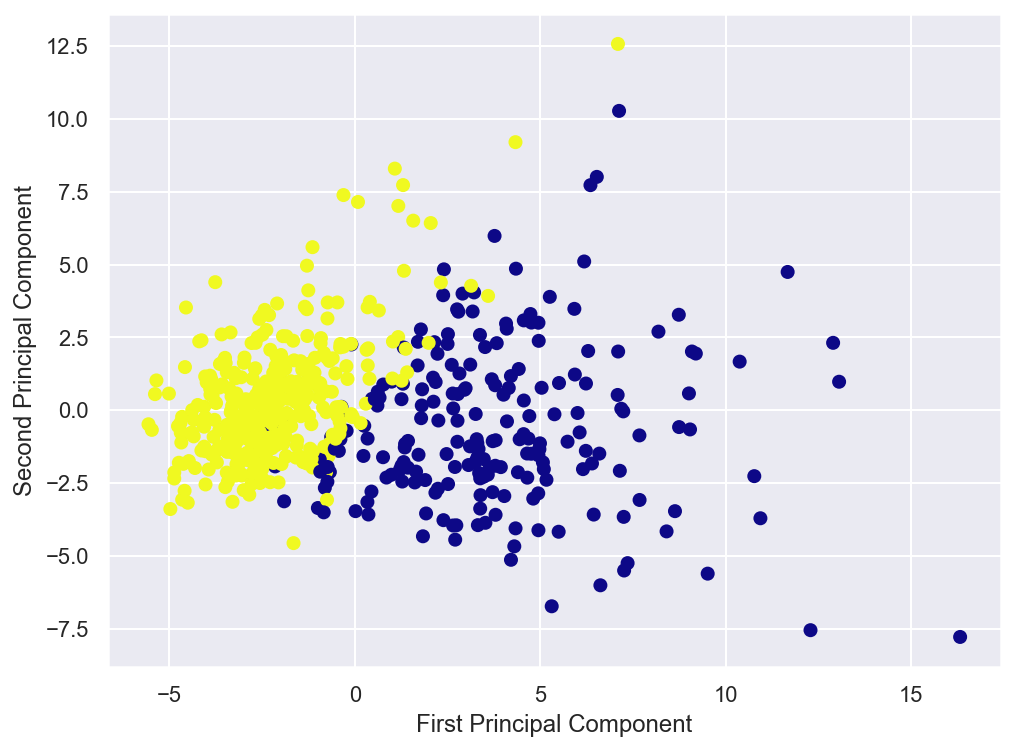

In [68]:
plt.figure(figsize=(8,6))
plt.scatter (x_scaled_pca [: , 0] , x_scaled_pca [:,1], c=dataset['target'] , cmap='plasma')

plt.xlabel ('First Principal Component')
plt.ylabel ('Second Principal Component')

In [70]:
df_principal_breast = pd.DataFrame(x_scaled_pca, columns=["principal component 1","principal component 2"]).iloc[:,:2]
df_principal_breast

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


Next, let's create a **new DataFrame** that will have the principal component values for all the samples.

In [71]:
df_principal_breast = pd.DataFrame()

Once you have the principal components, you can find the **explained_variance_ratio**. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [73]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the principal component 1 holds **44.2%** of the information while the principal component 2 holds only **19%** of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

## Plotting the visualization

<Figure size 432x288 with 0 Axes>

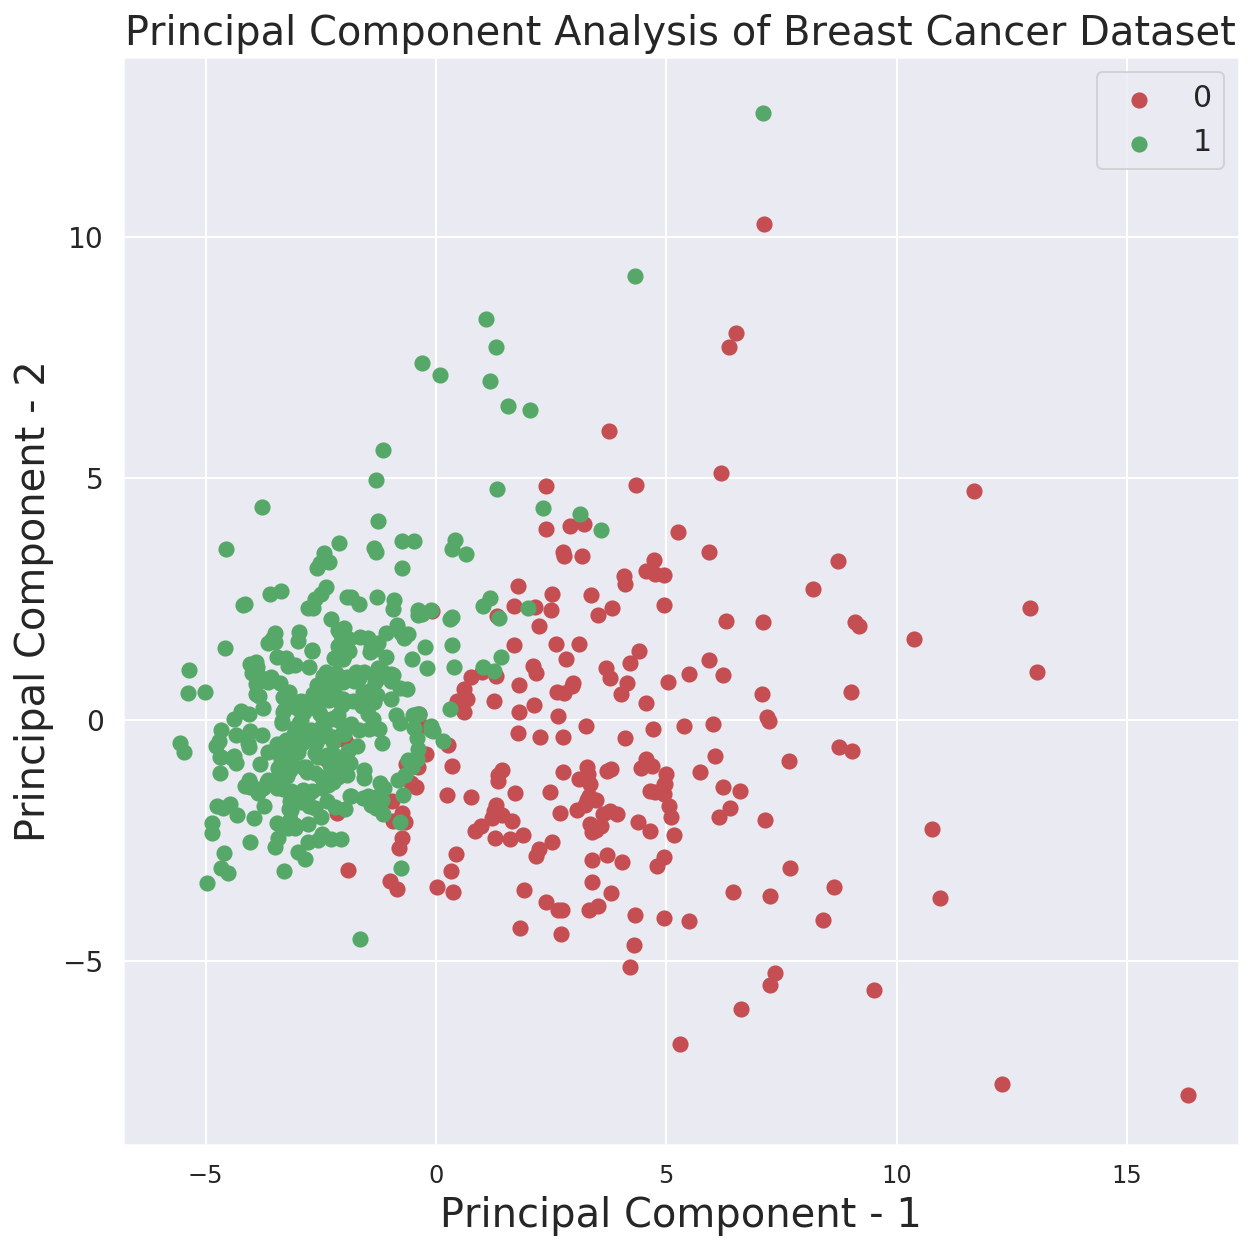

In [24]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_breast['target'] == target
    plt.scatter(df_principal_breast.loc[indicesToKeep, 'principal component 1']
               , df_principal_breast.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### Additional Challenge: Can you fix the labels in the plot so they are the original classes? 
Benign and Malign instead of 1 and 0